In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic traffic flow data (vehicle count + speed)

In [2]:
def generate_traffic_data(size=500):
    t = np.linspace(0, 50, size)
    vehicle_count = 50 + 10 * np.sin(0.5 * t) + np.random.normal(scale=5, size=size)
    avg_speed = 60 - 5 * np.cos(0.5 * t) + np.random.normal(scale=2, size=size)
    return np.stack([vehicle_count, avg_speed], axis=1).astype(np.float32)
 
data = generate_traffic_data()

# Normalize

In [3]:
mean = data.mean(axis=0)
std = data.std(axis=0)
data = (data - mean) / std

# Create sequences: past 24 steps to predict next vehicle count

In [4]:
def create_dataset(data, window=24, target_index=0):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window, target_index])  # Predict vehicle count
    return np.array(X), np.array(y)
 
X, y = create_dataset(data, window=24, target_index=0)

# Split data

In [5]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(24, 2)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

# Compile and train

In [7]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.9315 - val_loss: 0.5415
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4765 - val_loss: 0.3137
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3630 - val_loss: 0.3162
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3255 - val_loss: 0.3299
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3856 - val_loss: 0.3235
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3054 - val_loss: 0.3143
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3593 - val_loss: 0.3137
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3266 - val_loss: 0.3142
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3272 - val_loss: 0.3139
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3512 - val_loss: 0.3113


# Predict and plot

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


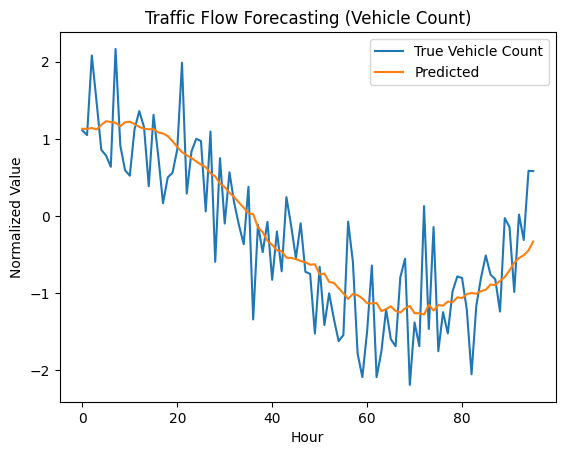

In [8]:
preds = model.predict(X_test[:100]).flatten()
plt.plot(y_test[:100], label='True Vehicle Count')
plt.plot(preds, label='Predicted')
plt.title("Traffic Flow Forecasting (Vehicle Count)")
plt.xlabel("Hour")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()